# Exercises for Day 5

Using SciPy, Scikit-Learn and Pandas

## 1. Scipy

Linear Algebra
Have a look at the `scipy.linalg` module

a. Define a matrix A

`[[1 2 3]
 [4 5 6]
 [7 8 9]]`

In [46]:
import numpy as np
from scipy import linalg

A = np.arange(1, 10).reshape(3, 3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

b. Define a vector b

`[1 2 3]`

In [47]:
b = np.arange(1, 4)
b

array([1, 2, 3])

c. Solve the linear system of equations A x = b

In [48]:
x = linalg.solve(A, b)
x

<ipython-input-48-815a2907d72f>:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = linalg.solve(A, b)


array([-0.23333333,  0.46666667,  0.1       ])

d. Check that your solution is correct by plugging it into the equation

In [49]:
A.dot(x.T)

array([1., 2., 3.])

e. Repeat steps a-d using a random 3x3 matrix B (instead of the vector b)

In [51]:
# Generate random matrix
B = np.random.rand(9).reshape(3, 3)
print(B)

# Solve for x
X = linalg.solve(A, B)
X

np.dot(A, X)

[[0.91236517 0.77366141 0.20822822]
 [0.61976273 0.05730501 0.10871871]
 [0.8508152  0.3502094  0.06346135]]


<ipython-input-51-9761b810e75c>:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  X = linalg.solve(A, B)


array([[0.5   , 0.    , 0.1875],
       [1.    , 0.    , 0.    ],
       [1.5   , 0.    , 0.0625]])

What the hell is this sorcery :-O looks like our matrix `A` behaves like a piece of crap. We can see that the condition number is very large which would indicate that solution of a linear system of equations is prone to large numerical errors.

In [70]:
print("condition number: %s" % np.linalg.cond(A))

condition number: 5.0522794445385096e+16


f. Solve the eigenvalue problem for the matrix A and print the eigenvalues and eigenvectors

In [66]:
eigenvalues, eigenvectors = linalg.eig(A)

print("eigenvalues of A: \n %s" % eigenvalues)
print("eigenvectors of A: \n %s" % eigenvectors)

eigenvalues of A: 
 [ 1.61168440e+01+0.j -1.11684397e+00+0.j -9.75918483e-16+0.j]
eigenvectors of A: 
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


g. Calculate the inverse, determinant of A

inverse and determinant of A? :-/

In [65]:
Ainverse = linalg.inv(A)
print("inverse of A: \n %s" % Ainverse)

Adet = linalg.det(A)
print("determinant of A = %s" % Adet)

inverse of A: 
 [[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
determinant of A = 0.0


h. Calculate the norm of A with different orders

In [62]:
A2norm = linalg.norm(A)
print("Frobenius norm %s" % A2norm)

Amaxnorm = linalg.norm(A, ord = np.inf)
print("max(abs(x)) norm %s" % Amaxnorm)

Aminnorm = linalg.norm(A, ord = -np.inf)
print("min(abs(x)) norm %s" % Aminnorm)

Frobenius norm 16.881943016134134
max(abs(x)) norm 24.0
min(abs(x)) norm 6.0


### Statistics

Have a look at the `scipy.stats` module

a. Create a discrete random variable with poissonian distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

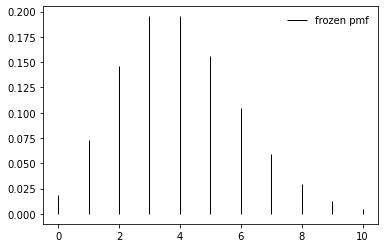

In [172]:
from scipy import stats

# Create new pot
fig, ax = plt.subplots(1, 1)

# Set some value for mu
mu = 4

x = np.arange(stats.poisson.ppf(0.001, mu),
               stats.poisson.ppf(0.999, mu))

# Generate random variable
rv = stats.poisson(mu=mu)

# Plot PMF
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

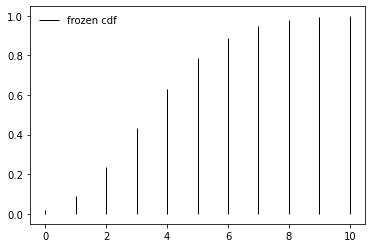

In [173]:
# Create new pot
fig, ax = plt.subplots(1, 1)
# Plot CDF
ax.vlines(x, 0, rv.cdf(x), colors='k', linestyles='-', lw=1,
         label='frozen cdf')
ax.legend(loc='upper left', frameon=False)
plt.show()

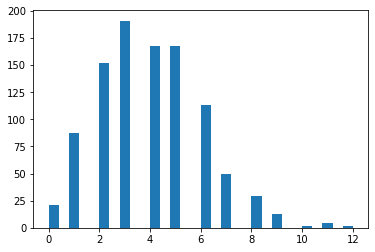

In [174]:
# Create new pot
fig, ax = plt.subplots(1, 1)
# Plot histogram
data_poisson = stats.poisson.rvs(mu=mu, size=1000)
plt.hist(data_poisson, bins=30)
plt.show()

b. Create a continious random variable with normal distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

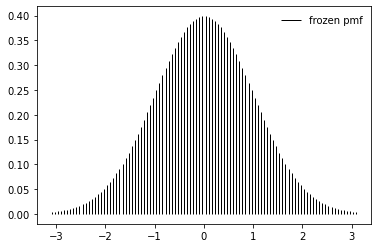

In [179]:
from scipy import stats

# Create new pot
fig, ax = plt.subplots(1, 1)

# Set some value for mu
x = np.linspace(stats.norm.ppf(0.001),
               stats.norm.ppf(0.999), 100)
x

## Generate random variable
rv = stats.norm()
#
# Plot PMF
ax.vlines(x, 0, rv.pdf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

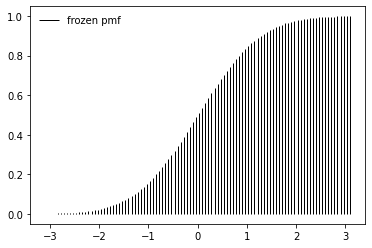

In [181]:
# Create new pot
fig, ax = plt.subplots(1, 1)
# Plot CDF
ax.vlines(x, 0, rv.cdf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='upper left', frameon=False)
plt.show()

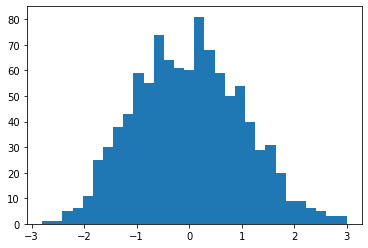

In [184]:
# Create new pot
fig, ax = plt.subplots(1, 1)
# Plot histogram
data_norm = stats.norm.rvs(size=1000)
plt.hist(data_norm, bins=30)
plt.show()

c. Test if two sets of (independent) random data comes from the same distribution

Hint: Have a look at the `ttest_ind` function

In [186]:
data_norm1 = stats.norm.rvs(size=1000)
data_norm2 = stats.norm.rvs(size=1000)

stats.ttest_ind(data_norm1, data_norm2)

Ttest_indResult(statistic=-0.04561439073078374, pvalue=0.9636221573428194)

From the test, we can see that we cannot reject the null hypothesis that the two distributions have the same mean.

# 2. Pandas
***

For this exercise you need to have Pandas installed (you can try to install it with pip)

Tutorials are taken from https://github.com/guipsamora/pandas_exercises

a. Download the notebook food_facts.ipynb and learn how to load and display data with Pandas

### Exercise 1

Step 1. Go to https://www.kaggle.com/openfoodfacts/world-food-facts/data

Step 2. Download the dataset to your computer and unzip it.

Step 3. Use the tsv file and assign it to a dataframe called food

In [232]:
import pandas as pd

df = pd.read_csv("data/en.openfoodfacts.org.products.tsv", sep="\t")

/Users/ludviglarsson/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Step 4. See the first 5 entries

In [233]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5. What is the number of observations in the dataset?

In [195]:
print("Number of observations in dataset: %s" % len(df.index))

Number of observations in dataset: 356027


### Step 6. What is the number of columns in the dataset?

In [196]:
print("Number of columns in dataset: %s" % len(df.columns))

Number of columns in dataset: 163


### Step 7. Print the name of all the columns.

In [201]:
[print(col) for col in df.columns]

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

### Step 8. What is the name of 105th column?

In [202]:
df.columns[104]

'-glucose_100g'

### Step 9. What is the type of the observations of the 105th column?

In [204]:
df.dtypes[104]

dtype('float64')

### Step 10. How is the dataset indexed?

A `DataFrame` i similar to a spreadsheet in its structure where both rows and columns are indexed. A `DataFrame` can be thought of as a `dict` of Series. 

A `DataFrame`'s index is backed up by a hash table and looking up rows based on index is analogous to looking up values based on a key. This makes it for example faster to look up rows based on index values rather than looking up rows based on column values.

### Step 11. What is the product name of the 19th observation?

In [234]:
df.loc[18, "product_name"]

'Lotus Organic Brown Jasmine Rice'

b. Download the notebook army.ipynb and try yourself to use Pandas for filtering and sorting of data

## Fictional Army - Filtering and Sorting

### Introduction:

This exercise was inspired by this [page](http://chrisalbon.com/python/)

Special thanks to: https://github.com/chrisalbon for sharing the dataset and materials.

### Step 1. Import the necessary libraries

### Step 2. This is the data given as a dictionary

In [260]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 3. Create a dataframe and assign it to a variable called army. 

#### Don't forget to include the columns names

In [261]:
army = pd.DataFrame(raw_data)
army.head()

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine


### Step 4. Set the 'origin' colum as the index of the dataframe

In [262]:
army = army.set_index("origin")
army.head()

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3


### Step 5. Print only the column veterans

In [263]:
army.loc[:, "veterans"]

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

### Step 6. Print the columns 'veterans' and 'deaths'

In [264]:
army.loc[:, ["veterans", "deaths"]]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


### Step 7. Print the name of all the columns.

In [265]:
[print(col) for col in army.columns]

regiment
company
deaths
battles
size
veterans
readiness
armored
deserters


[None, None, None, None, None, None, None, None, None]

### Step 8. Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska

In [266]:
army.loc[["Maine", "Alaska"], ["veterans", "deaths"]]

,veterans,deaths
origin,,
Maine,73,43
Alaska,949,523


### Step 9. Select the rows 3 to 7 and the columns 3 to 6

In [279]:
army.loc[army.index[2:7], army.columns[2:6]]

,deaths,battles,size,veterans
origin,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


### Step 10. Select every row after the fourth row

In [285]:
army.loc[army.index[4:], :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 12. Select the 3rd column up to the 7th column

In [286]:
army.loc[:, army.columns[2:7]]

,deaths,battles,size,veterans,readiness
origin,,,,,
Arizona,523,5,1045,1,1
California,52,42,957,5,2
Texas,25,2,1099,62,3
Florida,616,2,1400,26,3
Maine,43,4,1592,73,2
Iowa,234,7,1006,37,1
Alaska,523,8,987,949,2
Washington,62,3,849,48,3
Oregon,62,4,973,48,2


### Step 13. Select rows where df.deaths is greater than 50

In [288]:
army.loc[army["deaths"] > 50, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


### Step 14. Select rows where df.deaths is greater than 500 or less than 50

In [290]:
army.loc[(army["deaths"] > 500) | (army["deaths"] < 50), :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 15. Select all the regiments not named "Dragoons"

In [291]:
army.loc[army["regiment"] != "Dragoons", "regiment"]

origin
Arizona       Nighthawks
California    Nighthawks
Texas         Nighthawks
Florida       Nighthawks
Oregon            Scouts
Wyoming           Scouts
Louisana          Scouts
Georgia           Scouts
Name: regiment, dtype: object

### Step 16. Select the rows called Texas and Arizona

In [292]:
army.loc[["Texas", "Arizona"]]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4


### Step 17. Select the third cell in the row named Arizona

In [294]:
army.loc["Arizona", army.columns[2]]

523

### Step 18. Select the third cell down in the column named deaths

In [300]:
army.loc[army.index[2], "deaths"]

25

## Ex - GroupBy

### Introduction:

GroupBy can be summarizes as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv).

### Step 3. Assign it to a variable called drinks.

In [310]:
drinks = pd.read_csv("data/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [348]:
drinks[["continent", "beer_servings"]].groupby(["continent"]).mean()

,beer_servings
continent,
AF,61.471698
AS,37.045455
EU,193.777778
OC,89.687500
SA,175.083333


From this output we can see that Europe has the highest consumption of beer.

### Step 5. For each continent print the statistics for wine consumption.

In [341]:
drinks.groupby(["continent"]).agg(
    min_wine_consumption=pd.NamedAgg(column = "wine_servings", aggfunc = min),
    max_wine_consumption=pd.NamedAgg(column = "wine_servings", aggfunc = max),
    avg_wine_consumption=pd.NamedAgg(column = "wine_servings", aggfunc = lambda x: x.mean())
)

,min_wine_consumption,max_wine_consumption,avg_wine_consumption
continent,,,
AF,0,233,16.264151
AS,0,123,9.068182
EU,0,370,142.222222
OC,0,212,35.625000
SA,1,221,62.416667


### Step 6. Print the mean alcoohol consumption per continent for every column

In [342]:
drinks.groupby(["continent"]).mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcoohol consumption per continent for every column

In [350]:
drinks.groupby(["continent"]).median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [355]:
sumdf = pd.DataFrame(
    {"mean_spirit_servings" : [drinks["spirit_servings"].mean()],
    "min_spirit_servings" : [drinks["spirit_servings"].min()],
    "max_spirit_servings" : [drinks["spirit_servings"].max()]}
)
sumdf

,mean_spirit_servings,min_spirit_servings,max_spirit_servings
0,80.994819,0,438
